Nb nodes ToS:  13186


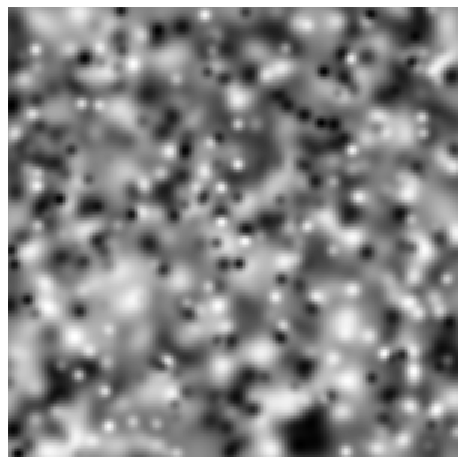

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [1]:
from helper import *

# Image must be an 8-bit gray-level image
image = io.imread('images/gaussians.png')

# ToS construction
tos = TreeOfShapes(image)
print('Nb nodes ToS: ', tos.get_nb_nodes())

# Image reconstruction from ToS
image = Image.fromarray(tos.reconstruct_image())
imshow(image, cmap='gray', figsize=(300,300))

CToS: 13438 nodes.
TToS: 971 nodes.


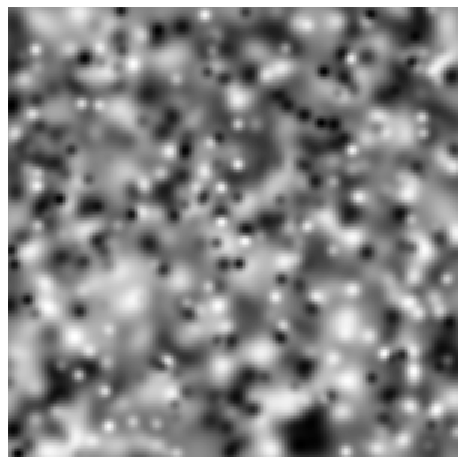

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [2]:
from topologicaltos import *

# Topological Tree of Shapes computation
ttos = TopologicalToS(tos)

# Reconstruction of the original image
image_ttos = ttos.reconstruct_img('orig')
imshow(image_ttos, cmap='gray', figsize=(300,300))

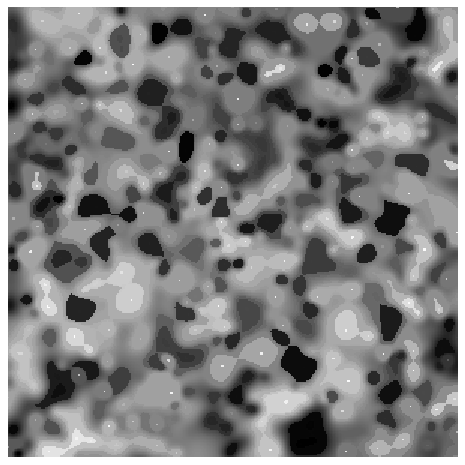

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [3]:
# Reconstruction strategy: quasi opening
image_ttos = ttos.reconstruct_img('quasi_opening')
imshow(image_ttos, cmap='gray', figsize=(300,300))

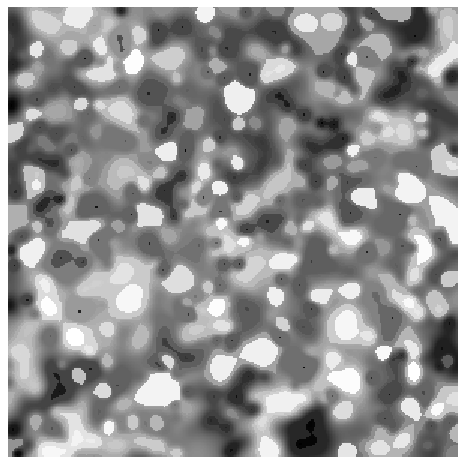

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [4]:
# Reconstruction strategy: quasi closing
image_ttos = ttos.reconstruct_img('quasi_closing')
imshow(image_ttos, cmap='gray', figsize=(300,300))

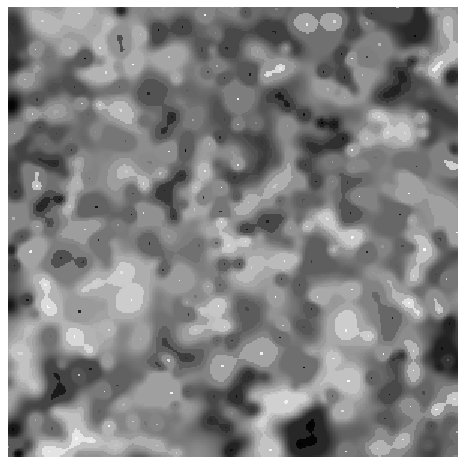

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [5]:
# Reconstruction strategy: to infimum of the parent
image_ttos = ttos.reconstruct_img('higher')
imshow(image_ttos, cmap='gray', figsize=(300,300))

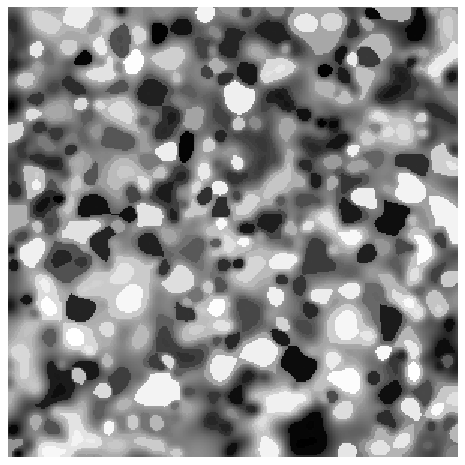

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [6]:
# Reconstruction strategy: to infimum of node
image_ttos = ttos.reconstruct_img('lower')
imshow(image_ttos, cmap='gray', figsize=(300,300))

In [7]:
from topologicaltos import *
from aicsimageio.writers import OmeTiffWriter

# Example with a 3D image
# Image must be an 8-bit gray-level image with tif format
image = io.imread('images/crop_100.tif')

# ToS construction
tos = TreeOfShapes(image)
print('Nb nodes ToS: ', tos.get_nb_nodes())

Nb nodes ToS:  203780


In [8]:
filtered_tos = copy.deepcopy(tos)

# Filtering of the ToS
filtered_tos.filter_tree_proper_part_bottom_up(40)

# Topological tree of shapes construction
ttos = TopologicalToS(filtered_tos)

CToS: 6561 nodes.
TToS: 2725 nodes.


In [9]:
# Filter by reconstruction: quasi opening
im_ttos = ttos.reconstruct_img('quasi_opening')
OmeTiffWriter.save(im_ttos, '3D_quasi_opening.tif')